# Task 2 for MIDAS Summer Internship

# Second Step

## Importing the Necessary Libraries 

In [ ]:
pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp37-none-any.whl size=7907 sha256=52b3d098c63c488f18b43029abfb4cad92159268b2fe01f268a7529f51c08685
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy


In [ ]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing import image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,Flatten, Dense, Dropout, BatchNormalization, LeakyReLU, MaxPool2D , Cropping2D
from keras.optimizers import Adam
from keras.models import Sequential
from keras import regularizers
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.layers import Lambda
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Loading The Dataset

In [ ]:
def LoadDataset():
  file_x = '/content/drive/MyDrive/MIDASTask/train-images-idx3-ubyte'
  x = idx2numpy.convert_from_file(file_x)
  file_y = '/content/drive/MyDrive/MIDASTask/train-labels-idx1-ubyte'
  y = idx2numpy.convert_from_file(file_y)
  return x,y


## Upload The Image Array
Since the image is already in gray-scale . What the function <i>UploadTheImageArray()</i> does is it resizes the image to 40 x 40 , then converts it into numpy array and then the values are divided by 255.0 

In [ ]:
def UploadTheImageArray(x_img):
  x_final = []
  for i in range(0,len(x_img)):
    img = x_img[i]
    res = cv2.resize(img, dsize=(40, 40))
    data = image.img_to_array(res)
    x_final.append(data/255.0)
  x_train = np.array(x_final)
  return x_train


## Convert Y into Categorical Data 
The function <i>ConvertToCategoricalValues()</i> converts y into Categorical data . 

In [ ]:
def ConvertToCategoricalValues(y_):
  y__ = to_categorical(y,num_classes=10, dtype = 'int')
  return y__

## Splitting the dataset into Train and Validation Set 

In [ ]:
def SplitItTrainAndValid(x_,y_):
  x_train, x_valid, y_train, y_valid = train_test_split(x_, y_, test_size=0.2, random_state=0)
  return x_train, x_valid, y_train, y_valid

## In the following cells the Function mentioned above have been executed .

In [ ]:
x,y = LoadDataset()

In [ ]:
x_preprocessed = UploadTheImageArray(x)

In [ ]:
y_ = ConvertToCategoricalValues(y)

In [ ]:
x_train, x_valid, y_train, y_valid = SplitItTrainAndValid(x_preprocessed, y_)

In [ ]:
print(x_train.shape,x_valid.shape, y_train.shape, y_valid.shape)

(48000, 40, 40, 1) (12000, 40, 40, 1) (48000, 10) (12000, 10)


## Visualizing the Original Image

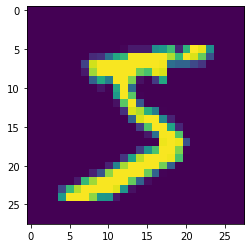

In [ ]:
plt.imshow(x[0])

## Visualing the Image after Pre-processing
The image has been resized to 40 x 40 . It is converted into an array and then the pixel values are divided by 255.0 .

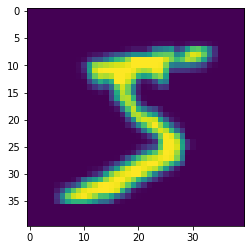

In [ ]:
img = x[0]
res = cv2.resize(img, dsize=(40, 40))
plt.imshow(res)

## Loading the Pre-Trained Model
The last layer of the Pre-Trained model has been removed and in place of that a softmax layer with 10 neurons have been added , since there are only 10 classes to predict from .



In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/MIDASTask/FirstModel/First_Step_Model.epoch11-loss0.72.hdf5')

In [ ]:
loaded_model.pop()

In [ ]:
model_pretrain = Sequential()
model_pretrain.add(loaded_model)
model_pretrain.add(Dense(10,activation = 'softmax'))

In [ ]:
model_pretrain.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 128)               81232     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 82,522
Trainable params: 82,394
Non-trainable params: 128
_________________________________________________________________


In [ ]:
model_pretrain.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:

path_model = 'Second_Step_Model_PreTrained.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/MIDASTask/SecondModelPreTrained/'+path_model, 
                             monitor = 'val_loss',
                             verbose=1, 
                             save_best_only=False,
                             mode= 'min')

In [ ]:
callbacks = [checkpoint]

In [ ]:
history_pretrained = model_pretrain.fit(x_train, y_train, batch_size = 512, epochs = 10,verbose = 2,validation_data = (x_valid, y_valid), callbacks=callbacks )

Epoch 1/10
94/94 - 45s - loss: 0.2621 - accuracy: 0.9241 - val_loss: 0.1029 - val_accuracy: 0.9664

Epoch 00001: saving model to /content/drive/MyDrive/MIDASTask/SecondModelPreTrained/Second_Step_Model_PreTrained.epoch01-loss0.10.hdf5
Epoch 2/10
94/94 - 44s - loss: 0.0551 - accuracy: 0.9837 - val_loss: 0.0667 - val_accuracy: 0.9780

Epoch 00002: saving model to /content/drive/MyDrive/MIDASTask/SecondModelPreTrained/Second_Step_Model_PreTrained.epoch02-loss0.07.hdf5
Epoch 3/10
94/94 - 44s - loss: 0.0377 - accuracy: 0.9890 - val_loss: 0.0519 - val_accuracy: 0.9839

Epoch 00003: saving model to /content/drive/MyDrive/MIDASTask/SecondModelPreTrained/Second_Step_Model_PreTrained.epoch03-loss0.05.hdf5
Epoch 4/10
94/94 - 45s - loss: 0.0272 - accuracy: 0.9924 - val_loss: 0.0382 - val_accuracy: 0.9879

Epoch 00004: saving model to /content/drive/MyDrive/MIDASTask/SecondModelPreTrained/Second_Step_Model_PreTrained.epoch04-loss0.04.hdf5
Epoch 5/10
94/94 - 45s - loss: 0.0201 - accuracy: 0.9946 - v

## Randomly Initialised Model

In [ ]:
model_random = Sequential()
model_random.add(Conv2D(16,(3,3),activation='relu',input_shape = (40,40,1)))
model_random.add(BatchNormalization())
model_random.add(MaxPool2D(2,2))

model_random.add(Conv2D(16,(3,3),activation='relu'))
model_random.add(BatchNormalization())
model_random.add(MaxPool2D(2,2))

model_random.add(Conv2D(32,(5,5),activation='relu'))
model_random.add(BatchNormalization())

model_random.add(Flatten())
model_random.add(Dense(128,activation ="relu"))
model_random.add(Dense(10,activation ="softmax"))

In [ ]:
model_random.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 38, 38, 16)        160       
_________________________________________________________________
batch_normalization_3 (Batch (None, 38, 38, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 17, 17, 16)        2320      
_________________________________________________________________
batch_normalization_4 (Batch (None, 17, 17, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 32)         

In [ ]:
model_random.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:

path_model = 'Second_Step_Model_Random.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint_1 = ModelCheckpoint(filepath='/content/drive/MyDrive/MIDASTask/SecondModelRandom/'+path_model, 
                             monitor = 'val_loss',
                             verbose=1, 
                             save_best_only=False,
                             mode= 'min')

In [ ]:
callbacks_1 = checkpoint_1

In [ ]:
history_random = model_random.fit(x_train, y_train, batch_size = 512, epochs = 10,verbose = 2,validation_data = (x_valid, y_valid), callbacks = callbacks_1)

Epoch 1/10
94/94 - 44s - loss: 0.3012 - accuracy: 0.9094 - val_loss: 2.2954 - val_accuracy: 0.3393

Epoch 00001: saving model to /content/drive/MyDrive/MIDASTask/SecondModelRandom/Second_Step_Model_Random.epoch01-loss2.30.hdf5
Epoch 2/10
94/94 - 45s - loss: 0.0630 - accuracy: 0.9818 - val_loss: 2.3307 - val_accuracy: 0.3587

Epoch 00002: saving model to /content/drive/MyDrive/MIDASTask/SecondModelRandom/Second_Step_Model_Random.epoch02-loss2.33.hdf5
Epoch 3/10
94/94 - 44s - loss: 0.0399 - accuracy: 0.9882 - val_loss: 1.5714 - val_accuracy: 0.5925

Epoch 00003: saving model to /content/drive/MyDrive/MIDASTask/SecondModelRandom/Second_Step_Model_Random.epoch03-loss1.57.hdf5
Epoch 4/10
94/94 - 44s - loss: 0.0286 - accuracy: 0.9920 - val_loss: 0.9096 - val_accuracy: 0.6868

Epoch 00004: saving model to /content/drive/MyDrive/MIDASTask/SecondModelRandom/Second_Step_Model_Random.epoch04-loss0.91.hdf5
Epoch 5/10
94/94 - 44s - loss: 0.0214 - accuracy: 0.9943 - val_loss: 0.3231 - val_accuracy: 

## Graphical Representaton of Loss and Accuracy of Train and Validation Set For PreTrained Model


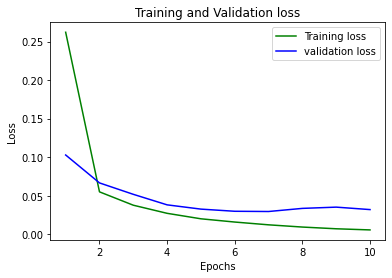

In [ ]:
loss_train = history_pretrained.history['loss']
loss_val = history_pretrained.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

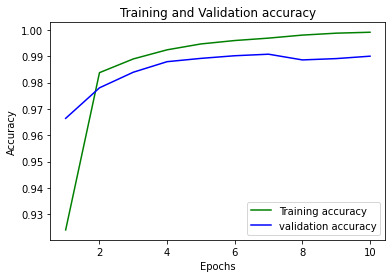

In [ ]:
loss_train = history_pretrained.history['accuracy']
loss_val = history_pretrained.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Graphical Representaton of Loss and Accuracy of Train and Validation Set For RandomlyInitialised Model

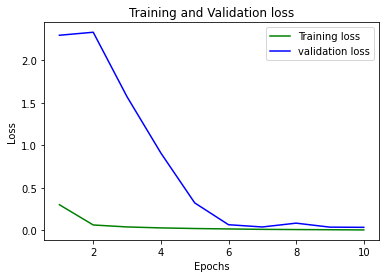

In [ ]:
loss_train = history_random.history['loss']
loss_val = history_random.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

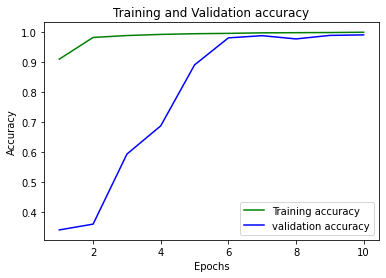

In [ ]:
loss_train = history_random.history['accuracy']
loss_val = history_random.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Uploading the Test Data 

In [ ]:
file = '/content/drive/MyDrive/MIDASTask/t10k-images-idx3-ubyte'
x_te = idx2numpy.convert_from_file(file)

In [ ]:
file = '/content/drive/MyDrive/MIDASTask/t10k-labels.idx1-ubyte'
y_te = idx2numpy.convert_from_file(file)

In [ ]:
x_te.shape

(10000, 28, 28)

In [ ]:
y_te.shape

(10000,)

In [ ]:
x_test = []
for i in range(0,10000):
  img = x_te[i]
  res = cv2.resize(img, dsize=(40, 40), interpolation=cv2.INTER_CUBIC)
  data = image.img_to_array(res)
  x_test.append(data/255.0)

In [ ]:
x_test_final = np.array(x_test)

In [ ]:
y_te = np.array(y_te)
y_test = to_categorical(y_te,num_classes=10, dtype = 'int')

In [ ]:
print(x_test_final.shape, y_test.shape)

(10000, 40, 40, 1) (10000, 10)


## Comparing the Accuracy of the last epoch model of PreTrain and Randomly Initialised Model 

In [ ]:
model_pretrain_loaded = tf.keras.models.load_model('/content/drive/MyDrive/MIDASTask/SecondModelPreTrained/Second_Step_Model_PreTrained.epoch10-loss0.03.hdf5')

In [ ]:
model_random_loaded = tf.keras.models.load_model('/content/drive/MyDrive/MIDASTask/SecondModelRandom/Second_Step_Model_Random.epoch10-loss0.04.hdf5')

In [ ]:
Score_PreTrain_LastEpoch = model_pretrain_loaded.evaluate(x_test_final,y_test,verbose = 0)

In [ ]:
Score_Random_LastEpoch = model_random_loaded.evaluate(x_test_final,y_test,verbose=0)

In [ ]:
print("Accuracy of Last Epoch of Pre-Trained Models is :", Score_PreTrain_LastEpoch[1])

Accuracy of Last Epoch of Pre-Trained Models is : 0.9894000291824341


In [ ]:
print("Accuracy of Last Epoch of Randomly Initialised Models is :", Score_Random_LastEpoch[1])

Accuracy of Last Epoch of Randomly Initialised Models is : 0.9890000224113464


## Calculating the Precision and Recall of PreTrain Model

In [ ]:
y_pred_pretrain = model_pretrain_loaded.predict(x_test_final)

In [ ]:
y_pred_final_pretrain = np.zeros_like(y_pred_pretrain)
y_pred_final_pretrain[np.arange(len(y_pred_pretrain)), y_pred_pretrain.argmax(1)] = 1
y_pred_final_pretrain = y_pred_final_pretrain.astype(int)

In [ ]:
precision_pretrain = precision_score(y_pred_final_pretrain, y_test,average = 'weighted')

In [ ]:
print(precision_pretrain)

0.9894695260242593


In [ ]:
recall_pretrain = recall_score(y_pred_final_pretrain, y_test,average = 'weighted')

In [ ]:
print(recall_pretrain)

0.9894


## Calculating the Precision and Recall of Randomly Initialised Model

In [ ]:
y_pred_random = model_random_loaded.predict(x_test_final)

In [ ]:
y_pred_final_random = np.zeros_like(y_pred_random)
y_pred_final_random[np.arange(len(y_pred_random)), y_pred_random.argmax(1)] = int(1)
y_pred_final_random = y_pred_final_random.astype(int)

In [ ]:
precision_random = precision_score(y_pred_final_random, y_test, average = 'weighted')

In [ ]:
print(precision_random)

0.9890316840596978


In [ ]:
recall_random = recall_score(y_pred_final_random, y_test, average = 'weighted')

In [ ]:
print(recall_random)

0.989


## Comparision between Pretrain and Randomly Initialised Model

<table>
  <tr>
    <th>Evaluation Metric</th>
    <th>Pre-Trained Model</th>
    <th>Randomly Initialised Model</th>
  </tr>
  <tr>
    <td>Accuracy</td>
    <td>98.940%</td>
    <td>98.900%</td>
  </tr>
  <tr>
    <td>Precision (Average = Weighted) </td>
    <td>98.947%</td>
    <td>98.903%</td>
  </tr>
  <tr>
    <td>Recall (Average = Weighted)</td>
    <td>98.940%</td>
    <td>98.900%</td>
  </tr>
  <tr>
    <td>Convergence Time</td>
    <td>We can see that , the convergence <br> time is less as it converges very <br> early  . It happened as the <br> model was already familiar with <br> the numbers , since it was trained <br> on the alphabets and numebers in step 1. 
    </td>
    <td>We can see that , the convergence <br> time is more .  It happened since the <br> model was an untrained one and <br> prior to training , it was not aware <br> of the numbers . It saw the dataset for the first time .</td>
  </tr>




## 